<a href="https://colab.research.google.com/github/viviantram03/labb-1/blob/main/AI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [7]:
# data acquisition
# load the dataset
df = pd.read_csv('Air_Pollution_data.csv')

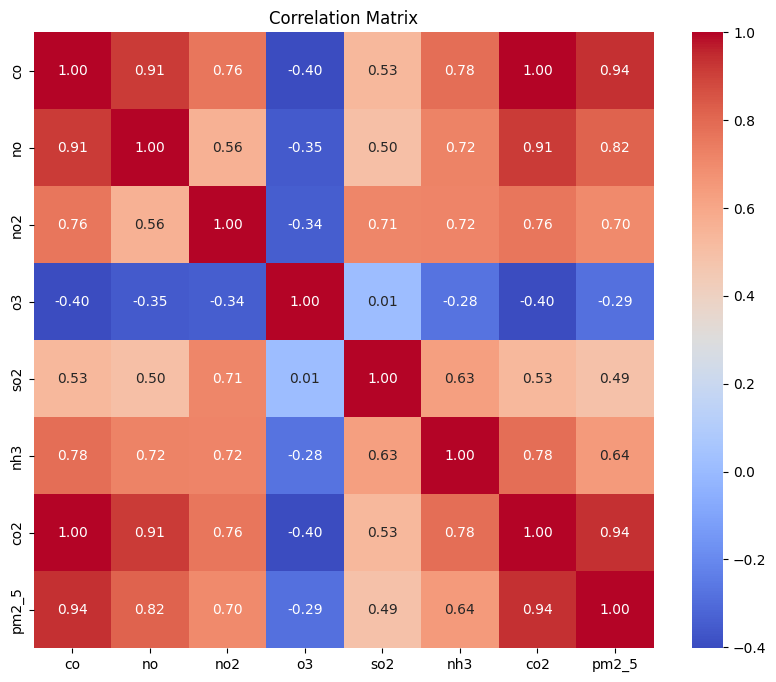

Training samples: 13143
Testing samples: 5633


In [8]:
# select features (pollutants) and target (PM2.5)
# pm10 is excluded to prevent data leakage
features = ['co', 'no', 'no2', 'o3', 'so2','nh3', 'co2']
target = 'pm2_5';

# drop rows with missing values to ensure clean training data
data = df[features + [target]].dropna()

# check correlation to see relationship before training
# this helps us understand if features overlap too much (multicollinearity)
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# split data into training (70%) and testing (30%) sets
# using chronological split to handle time-series data correctly
X = data[features]
y = data[target]

split_index = int(0.7 * len(data))
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")






In [9]:
# model A: linear regression (baseline)
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# model B: random forest regressor (advanced)
print("Training Random Forest...")
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Training Linear Regression...
Training Random Forest...


In [10]:
# evaluation

# calculate R2 score (how well the model explains variance)
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

# calculate MAE (average error in real units)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# print results
print("\n" + "="*50)
print("Final Results")
print("="*50)
print(f"Linear Regression: -> R2: {r2_lr:.4f} | MAE: {mae_lr: .4f} ")
print(f"Random Forest: -> R2: {r2_rf:.4f} | MAE: {mae_rf: .4f}")
print("="*50)


Final Results
Linear Regression: -> R2: 0.9216 | MAE:  42.4190 
Random Forest: -> R2: 0.9400 | MAE:  35.0176


/tmp/ipython-input-1452809196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')


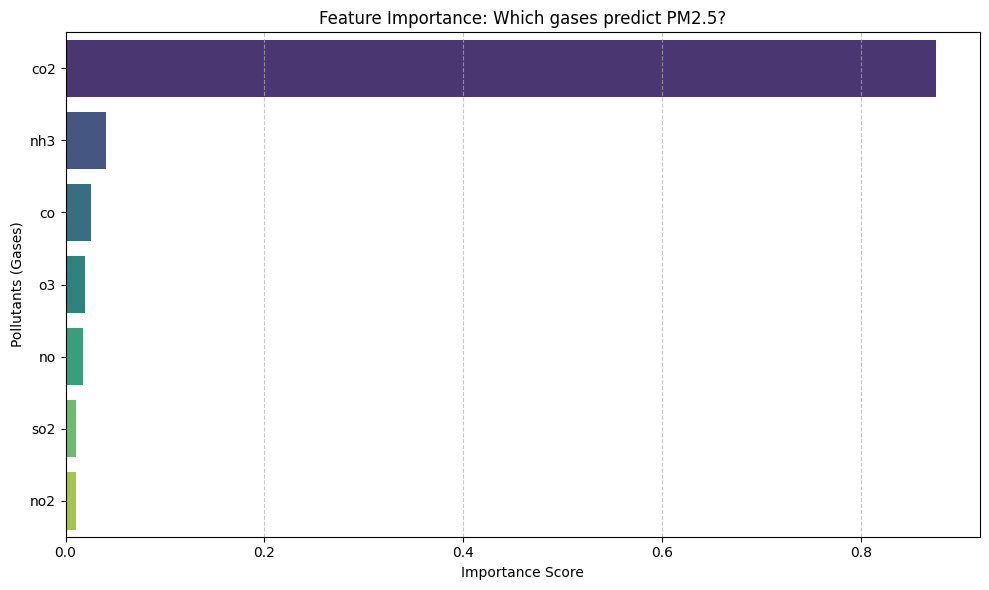

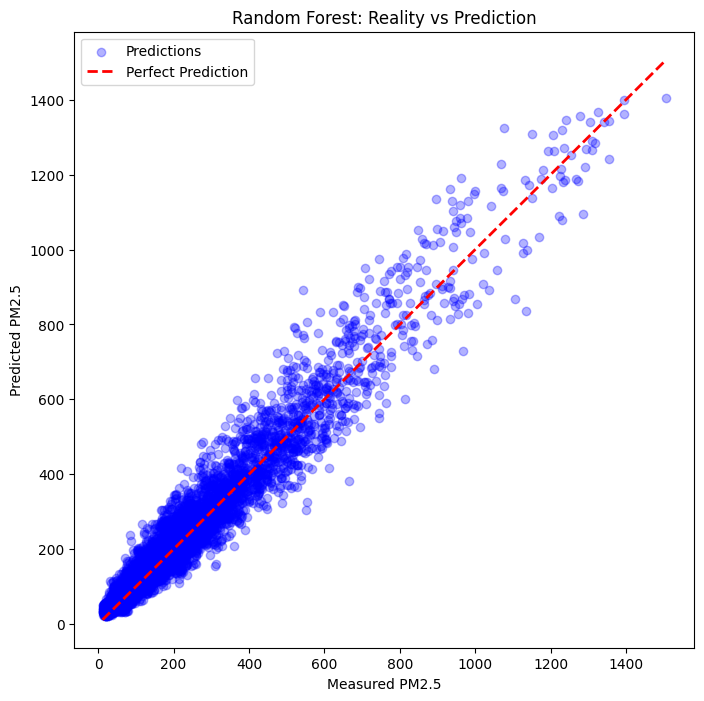

In [11]:
# visualization 1: feature importance

# plotting which pollutants drive pm2.5 levels
plt.figure(figsize=(10,6))
feature_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
plt.title('Feature Importance: Which gases predict PM2.5?')
plt.xlabel('Importance Score')
plt.ylabel('Pollutants (Gases)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# visualization 2: error analysis

# plotting predicted vs actual values to see how model handles peaks

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Measured PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Random Forest: Reality vs Prediction')
plt.legend()
plt.show()

